### Research Objectives:
1. Determine the relationship between the students’ debugging scores and the quality of discourse
2. Determine the performance distribution given the respective achievement level of the pair programmers

#### Relationship between students’ debugging performances with respect to his/her discourse quality
- Correlate the debugging scores and discourse quality such as the discourse classes and volume
- Fit a regression model and determine levels of contribution of variables to the debugging score
- Replicate the aforementioned steps but using differences of debugging scores of the pair programmers

### to try:
- group acts by main acts: inf, res, imp, eli, arg
- group by sex
- group by dynamic, static

In [1]:
# Importing packages
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

/home/jerelyn/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Directories
data_dir = "data/"
data_proc_dir = data_dir + "proc/"

In [3]:
stud_df = pd.read_csv(data_proc_dir + "student_data.csv", index_col="student").dropna()

In [4]:
stud_df.head()

,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,EliOpn,EliPrp,EliSet,EliVer,ImpAct,...,ResDen,ResSol,ResStm,school,static_or_dynamic,individual_or_pair,gender,pre_test_score,self_efficacy,debugging_scores
student,,,,,,,,,,,,,,,,,,,,,
ADDU-DP01A,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,3.0,4.0,...,0.0,1.0,1.0,ADDU,Dynamic,Pair,M,8.0,5.53,25.0
ADDU-DP01B,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,3.0,2.0,ADDU,Dynamic,Pair,M,9.0,5.56,22.0
ADDU-DP03A,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,ADDU,Dynamic,Pair,M,8.0,5.06,17.0
ADDU-DP03B,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,ADDU,Dynamic,Pair,F,4.0,3.53,10.0
ADDU-DP07A,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,6.0,...,0.0,1.0,5.0,ADDU,Dynamic,Pair,M,5.0,3.78,19.0


In [5]:
cols_classes = ['ArgCcl', 'ArgCnt', 'ArgCon', 'ArgEla', 'ArgRsn', 'EliOpn', 'EliPrp', 'EliSet', 'EliVer',
                'ImpAct', 'ImpFoc', 'InfAct', 'InfNeg', 'InfNeu', 'InfNon', 'InfPos', 'InfSoc', 'InfSol',
                'InfStm', 'ResCfm', 'ResDen','ResSol', 'ResStm']
class_group = ['Arg', 'Eli', 'Imp', 'Inf', 'Res']
cols_classes_groups = ['grp_' + grp for grp in class_group]
cols_tests = ['pre_test_score', 'self_efficacy', 'debugging_scores']

In [6]:
for group in class_group:
    stud_df['grp_' + group] = stud_df[stud_df.columns[pd.Series(stud_df.columns).str.startswith(group)]].sum(1)
    
stud_df[cols_classes_groups + cols_classes]

,grp_Arg,grp_Eli,grp_Imp,grp_Inf,grp_Res,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,...,InfNeu,InfNon,InfPos,InfSoc,InfSol,InfStm,ResCfm,ResDen,ResSol,ResStm
student,,,,,,,,,,,,,,,,,,,,,
ADDU-DP01A,1.0,7.0,7.0,18.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,0.0,2.0,1.0,2.0,3.0,0.0,1.0,1.0
ADDU-DP01B,0.0,3.0,4.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,3.0,5.0,4.0,0.0,3.0,2.0
ADDU-DP03A,1.0,3.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
ADDU-DP03B,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0
ADDU-DP07A,0.0,5.0,7.0,23.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,7.0,0.0,5.0,7.0,0.0,1.0,5.0
ADDU-DP07B,1.0,17.0,5.0,23.0,11.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,2.0,3.0,12.0,4.0,4.0,0.0,7.0,0.0
ADDU-DP08A,0.0,9.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
ADDU-DP08B,0.0,1.0,1.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,2.0
ADDU-SP01A,0.0,2.0,3.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,3.0


## Corellation

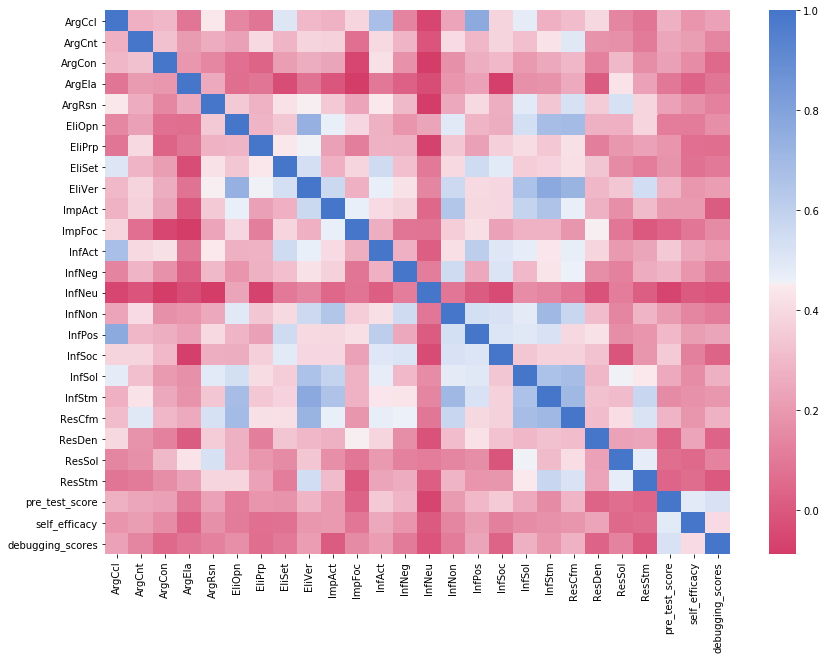

In [7]:
plt.figure(figsize=(14,10))

cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
corr_res = stud_df[cols_classes+cols_tests].corr()
sns.heatmap(corr_res, cmap=cmap)

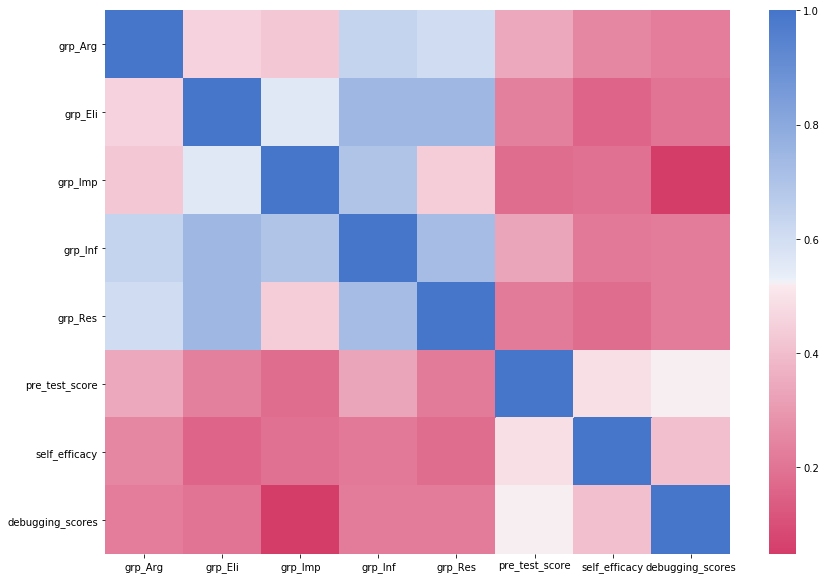

In [8]:
plt.figure(figsize=(14,10))

cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
corr_res = stud_df[cols_classes_groups+cols_tests].corr()
sns.heatmap(corr_res, cmap=cmap)

/home/jerelyn/miniconda3/lib/python3.6/site-packages/matplotlib-2.1.1+1053.g3bb328f-py3.6-linux-x86_64.egg/matplotlib/contour.py:950: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


AttributeError: module 'seaborn' has no attribute 'scatterplot'

<Figure size 1008x720 with 0 Axes>

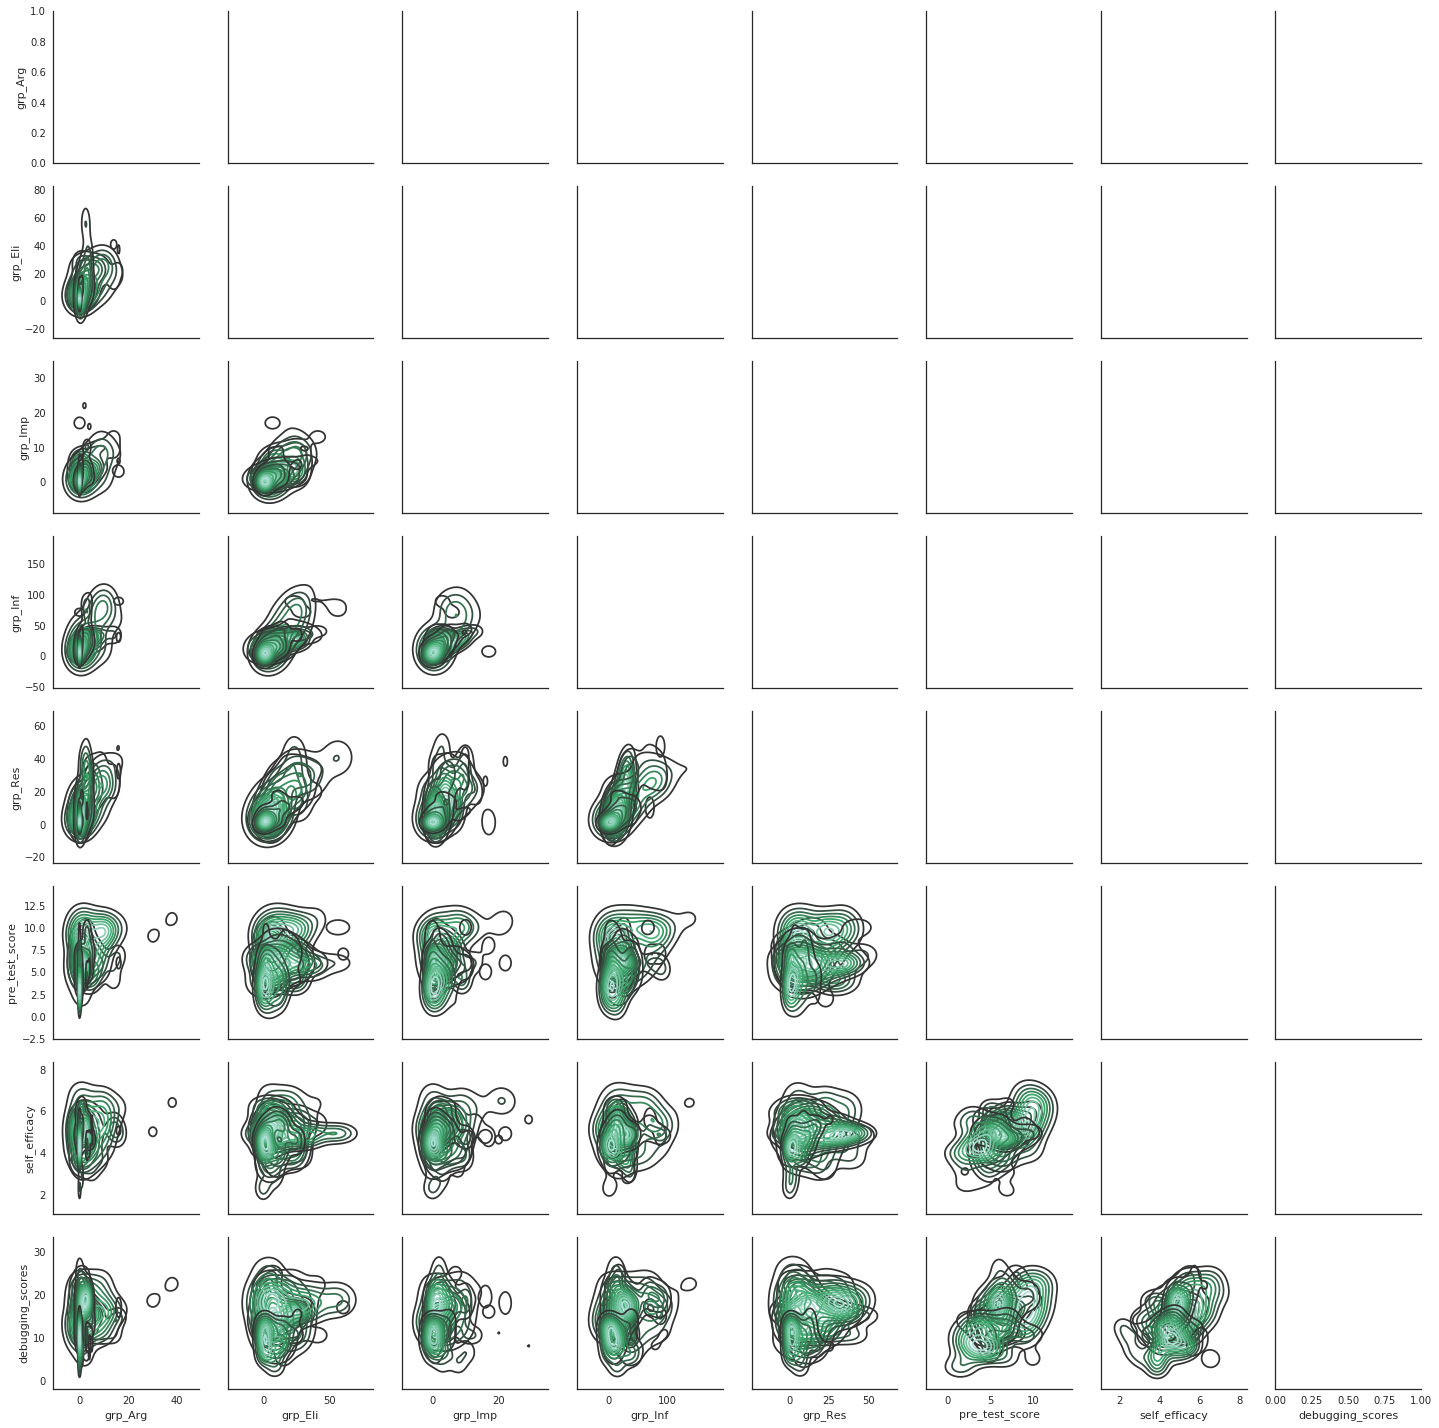

In [9]:
plt.figure(figsize=(14,10))

sns.set(style="white")

g = sns.PairGrid(stud_df[cols_classes_groups+cols_tests + ['school']], hue="school", diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
g.add_legend()

## Training Prep

In [10]:
# pred vs actual viz

def pred_vs_actual_viz():
    start = min(min(y_test), min(y_pred)) - 10 # minus 10 for buffer
    end = max(max(y_test), max(y_pred)) + 10 # added 10 for buffer
    line_coordinates = np.arange(start,end)

    plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.xlim(start, end)
    plt.ylim(start, end)
    plt.plot(line_coordinates,line_coordinates)
    plt.show()
    print("MSE: {}".format(metrics.mean_squared_error(y_pred, y_test)))

In [11]:
X = stud_df[cols_classes + ['pre_test_score', 'self_efficacy']]
# X = stud_df[cols_classes]
y = stud_df['debugging_scores']

In [12]:
# Train-test split
# !! Important to split the data first to train-test before cross validation to avoid data leakage
train_perc = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_perc)
# train_idx = int(X.shape[0] * train_perc)
# X_train, y_train = X.iloc[:train_idx], y.iloc[:train_idx]
# X_test, y_test = X.iloc[train_idx:], y.iloc[train_idx:]

X_train.reset_index(inplace=True, drop=True)
y_train = y_train.values
X_test.reset_index(inplace=True, drop=True)
y_test = y_test.values


print("Train set shape: {}".format(X_train.shape))
print("Test set shape: {}".format(X_test.shape))

Train set shape: (87, 25)
Test set shape: (22, 25)


In [13]:
# Scaling predictors (X_train)
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled, columns=X_train.columns)

## Regression

In [14]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() # with constant
y_pred = model.predict(scaler.fit_transform(sm.add_constant(X_test)))

# model = sm.OLS(y_train, X_train).fit() # without constant
# y_pred = model.predict(scaler.fit_transform(X_test))

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     2.593
Date:                Sun, 09 Sep 2018   Prob (F-statistic):            0.00130
Time:                        20:40:36   Log-Likelihood:                -228.19
No. Observations:                  87   AIC:                             508.4
Df Residuals:                      61   BIC:                             572.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.9358      1.593      4.354      0.000       3.750      10.121
ArgCcl            -4.6824      9.117     -0.514      0.609     -22.912      13.547
ArgCnt            -0.6083      2.948     -0.206      0.837      -6.503       5.287
ArgCon            -2.6330      2.463     -1.069      0.289      -7.558       2.292
ArgEla            -3.6108      4.411     -0.819      0.416     -12.432       5.210
ArgRsn            -3.5685      3.759     -0.949      0.346     -11.085       3.948
EliOpn            -4.9209      5.349     -0.920      0.361     -15.617       5.776
EliPrp            -4.3952      3.317     -1.325      0.190     -11.027       2.237
EliSet            -1.1277      4.436     -0.254      0.800      -9.998       7.743
EliVer             2.0816      4.786      0.435      0.665      -7.489      11.652
ImpAct           -12.6400      4.207     -3.004      0.004     -21.053      -4.227
ImpFoc             7.5734      3.896      1.944      0.057      -0.217      15.364
InfAct             3.2220      4.820      0.668      0.506      -6.416      12.860
InfNeg            -1.5979      3.134     -0.510      0.612      -7.864       4.668
InfNeu            -3.3673      3.723     -0.904      0.369     -10.812       4.078
InfNon            -0.8097      4.774     -0.170      0.866     -10.355       8.736
InfPos             5.9139      9.301      0.636      0.527     -12.685      24.513
InfSoc            -2.7130      3.735     -0.726      0.470     -10.182       4.756
InfSol             4.7146      4.040      1.167      0.248      -3.363      12.792
InfStm             6.7038      4.433      1.512      0.136      -2.161      15.568
ResCfm             7.6279      4.497      1.696      0.095      -1.363      16.619
ResDen            -3.9449      3.289     -1.199      0.235     -10.522       2.633
ResSol             2.7508      3.055      0.900      0.371      -3.359       8.860
ResStm            -4.7948      3.426     -1.400      0.167     -11.645       2.056
pre_test_score     7.6649      2.432      3.151      0.003       2.801      12.529
self_efficacy      5.1320      2.719      1.887      0.064      -0.305      10.569
==============================================================================
Omnibus:                        3.584   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                2.886
Skew:                           0.415   Prob(JB):                        0.236
Kurtosis:                       3.327   Cond. No.                         44.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

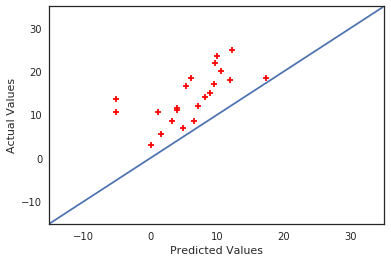

MSE: 86.59126664456728


In [15]:
pred_vs_actual_viz()

## Difference in debugging score

In [16]:
temp_remove_pair = {'ADDU-DP02', 'ADDU-SP04'} 
unique_pairs = set(stud_df.index.str[:-1]) - temp_remove_pair
pair_df = pd.DataFrame(index=unique_pairs, columns=cols_classes + cols_tests + ['school', 'static_or_dynamic', 'gender'])

# print('A')
# print(stud_df.loc['ADNU-DP02'+ 'A'].get(cols_tests))

# print('B')
# print(stud_df.loc['ADNU-DP02'+ 'B'].get(cols_tests))

# print('----')
# stud_df.loc['ADNU-DP02'+ 'A'].get(cols_tests).subtract(stud_df.loc['ADNU-DP02'+ 'B'].get(cols_tests)).abs()

for pair in unique_pairs:
    pair_df.loc[pair][cols_tests] = stud_df.loc[pair + 'A'].get(cols_tests).subtract(stud_df.loc[pair + 'B'].get(cols_tests)).abs()
    pair_df.loc[pair][['school', 'static_or_dynamic', 'gender']] = stud_df.loc[pair + 'A'][['school', 'static_or_dynamic', 'gender']]
    pair
    
pair_df[cols_tests] = pair_df[cols_tests].apply(pd.to_numeric, errors='coerce', axis=1)

In [20]:
pair_df

,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,EliOpn,EliPrp,EliSet,EliVer,ImpAct,...,ResCfm,ResDen,ResSol,ResStm,pre_test_score,self_efficacy,debugging_scores,school,static_or_dynamic,gender
ADMU-DPx2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.435484,1.0,ADMU,Dynamic,F
ADMU-SP01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,0.593750,0.5,ADMU,Static,M
ADNU-DP07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.090000,5.0,ADNU,Dynamic,F
ADNU-SP07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.530000,0.5,ADNU,Static,F
ADDU-DP01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.030000,3.0,ADDU,Dynamic,M
ADMU-SPx1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.281250,0.0,ADMU,Static,M
ADMU-DP02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.187500,9.0,ADMU,Dynamic,M
ADNU-DP02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.690000,3.0,ADNU,Dynamic,F
ADNU-SP04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,0.280000,0.5,ADNU,Static,M
ADNU-DP01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.940000,8.0,ADNU,Dynamic,M


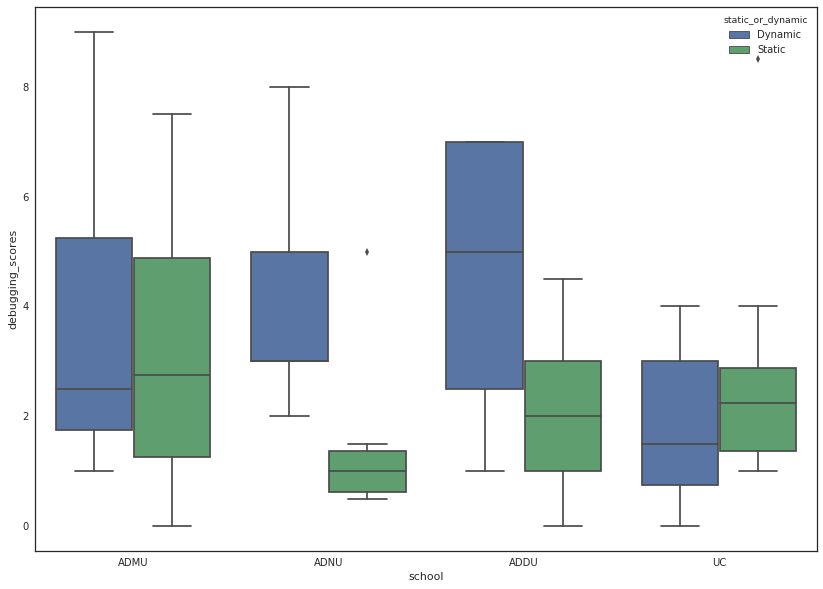

In [17]:
plt.figure(figsize=(14,10))
sns.boxplot(x='school', y='debugging_scores', hue='static_or_dynamic',  data=pair_df)

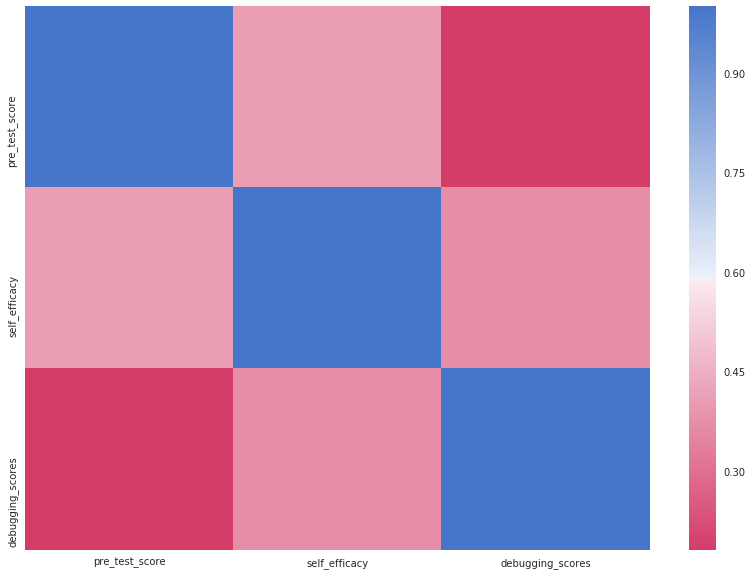

In [18]:
plt.figure(figsize=(14,10))

cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
corr_res = pair_df[cols_classes+cols_tests].corr()
sns.heatmap(corr_res, cmap=cmap)

In [19]:
stud_df['static_or_dynamic']

student
ADDU-DP01A    Dynamic
ADDU-DP01B    Dynamic
ADDU-DP03A    Dynamic
ADDU-DP03B    Dynamic
ADDU-DP07A    Dynamic
ADDU-DP07B    Dynamic
ADDU-DP08A    Dynamic
ADDU-DP08B    Dynamic
ADDU-SP01A     Static
ADDU-SP01B     Static
ADDU-SP02A     Static
ADDU-SP02B     Static
ADDU-SP03A     Static
ADDU-SP03B     Static
ADDU-SP04A     Static
ADDU-SP05A     Static
ADDU-SP05B     Static
ADDU-SP06A     Static
ADDU-SP06B     Static
ADDU-SP07A     Static
ADDU-SP07B     Static
ADDU-SP08A     Static
ADDU-SP08B     Static
ADMU-DP01A    Dynamic
ADMU-DP01B    Dynamic
ADMU-DP02A    Dynamic
ADMU-DP02B    Dynamic
ADMU-DP03A    Dynamic
ADMU-DP03B    Dynamic
ADMU-DP05A    Dynamic
               ...   
UC-DP02A      Dynamic
UC-DP02B      Dynamic
UC-DP03A      Dynamic
UC-DP03B      Dynamic
UC-DP04A      Dynamic
UC-DP04B      Dynamic
UC-DP05A      Dynamic
UC-DP05B      Dynamic
UC-DP06A      Dynamic
UC-DP06B      Dynamic
UC-DP07A      Dynamic
UC-DP07B      Dynamic
UC-DP08A      Dynamic
UC-DP08B      Dynamic
UC